In [3]:
library("data.table")
library("qtl")

# inputs

In [25]:
genfile =  '../data/20210104_matrices2/20210105_rqtl_geno_wscomposite_onlyflipfilter.csv'
phefile = '../data/20210106_standardised_pheno.csv'

In [26]:
datf2 <- read.cross(format = "csvs",
                    genotypes = c(-1,0,1,"C","D"),
                    dir='.',
                    genfile=genfile,
                    phefile = phefile )

Warning message in read.cross.csvs(dir, genfile, phefile, na.strings, genotypes, :
“2 individuals with genotypes but no phenotypes
    913407|910907
”
Warning message in read.cross.csvs(dir, genfile, phefile, na.strings, genotypes, :
“1931 individuals with phenotypes but no genotypes
    43102|43202|43302|43402|43502|43602|43702|43802|45402|46002|47302|48802|49002|49402|49902|51802|55302|70802|75702|81802|82602|84802|87302|89702|90402|91002|92502|95602|101902|117602|123402|125602|126302|130102|131002|324003|324103|328303|328603|337903|347403|354903|329704|330004|335004|337404|342104|344304|349204|361004|362404|375204|611705|623505|634305|634505|634805|623305|842706|844606|844706|849906|850406|850506|852006|855906|857806|858006|858106|866406|910707|912007|913207|900507|900607|901107|901407|901907|902207|902607|902707|903007|903107|903307|903507|903707|903807|904307|904607|904907|905107|905407|906507|906607|906907|907007|907307|907707|907907|908007|908107|908407|908507|908707|908807|9089

 --Read the following data:
	 5287  individuals
	 1058  markers
	 4  phenotypes
 --Cross type: f2 


In [27]:
summary(datf2)

    F2 intercross

    No. individuals:    5287 

    No. phenotypes:     4 
    Percent phenotyped: 100 92.6 100 95.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1058 
    No. markers:        198 150 111 92 83 60 37 37 31 25 22 21 21 20 17 14 14 12 
                        11 11 9 8 7 7 7 7 7 7 6 6 
    Percent genotyped:  53.4 
    Genotypes (%):      AA:27.0  AB:46.7  BB:26.3  not BB:0.0  not AA:0.0 

# subset the data to only include Wahlberg Markers

In [36]:
# load data - which bins have a Wahlberg 2009 marker?
Wahlberg_bins = read.table('../../../../chicken-assoc-vis/data/20201117_all_bins_with_WB_marker.csv', sep = ',', header=1)

In [37]:
Wahlberg_bins

X,X0,X1
<int>,<fct>,<int>
0,1-0,1
1,1-1,1
2,1-3,1
3,1-6,1
4,1-14,1
5,1-16,1
6,1-17,1
7,1-24,1
8,1-29,1


In [38]:
datf2 <- pull.markers(datf2, Wahlberg_bins$X0 )

Warning message in pull.markers(datf2, Wahlberg_bins$X0):
“Some markers couldn't be found: 20-11 20-11 20-11 20-13”


In [39]:
summary(datf2)

    F2 intercross

    No. individuals:    5287 

    No. phenotypes:     4 
    Percent phenotyped: 100 92.6 100 95.9 

    No. chromosomes:    28 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 

    Total markers:      325 
    No. markers:        62 48 26 29 16 11 14 6 10 11 8 6 9 6 8 1 7 3 7 8 5 2 3 5 
                        2 5 4 3 
    Percent genotyped:  52.8 
    Genotypes (%):      AA:26.7  AB:46.9  BB:26.4  not BB:0.0  not AA:0.0 

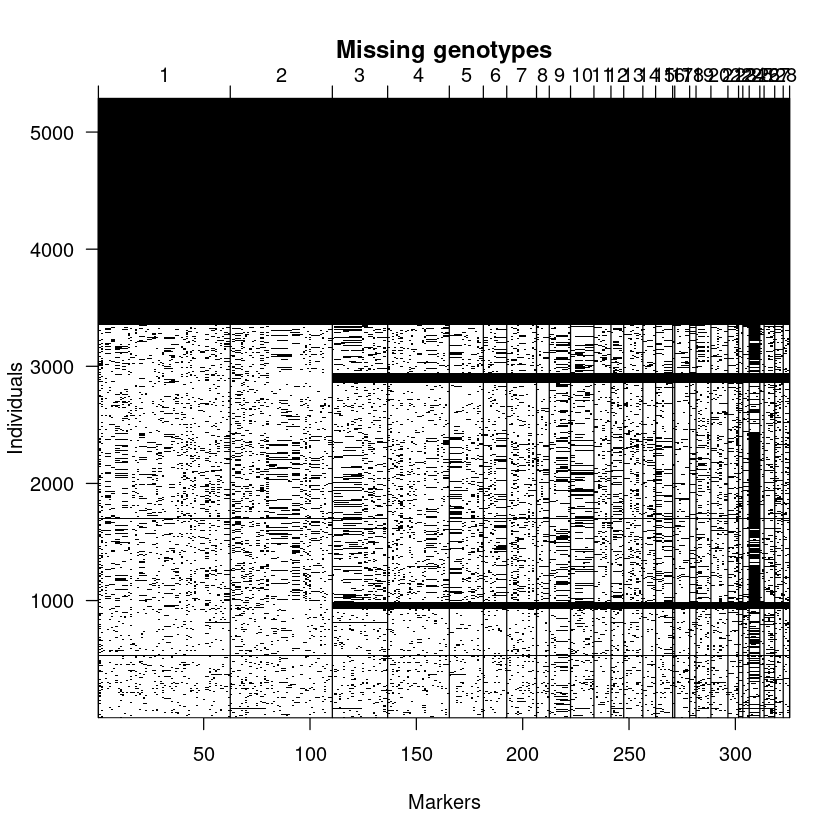

In [40]:
plotMissing(datf2)

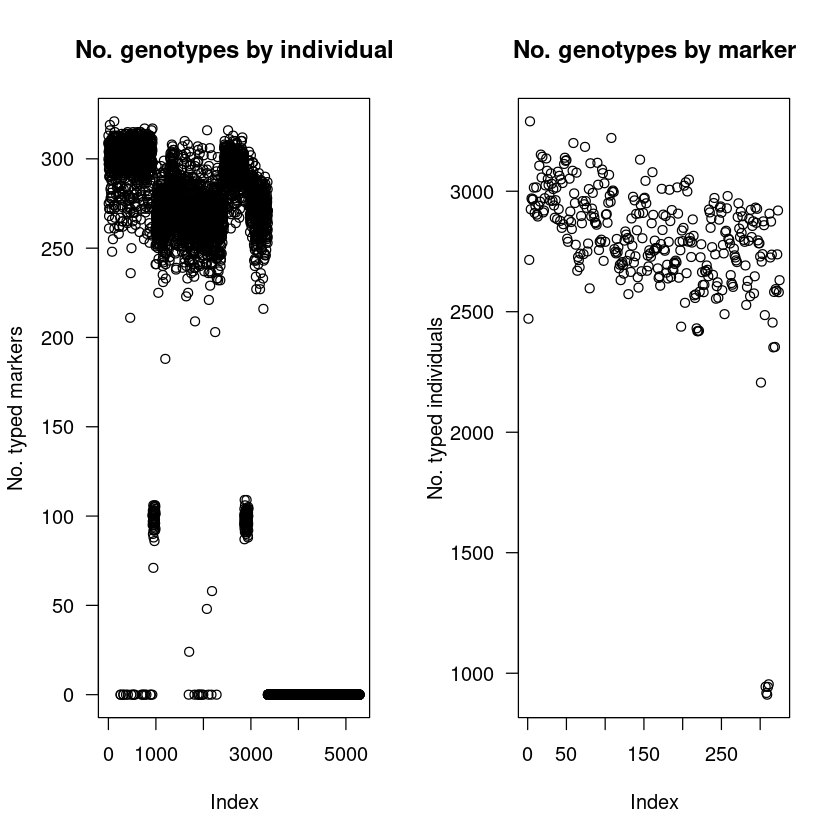

In [41]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2), ylab="No. typed markers", main="No. genotypes by individual")
plot(ntyped(datf2, "mar"), ylab="No. typed individuals", main="No. genotypes by marker")

In [46]:
nt.bymar <- ntyped(datf2, "mar")
todrop <- names(nt.bymar[nt.bymar < 100])   # changed the filtering here


In [47]:
todrop

character(0)

In [12]:
datf2.1 <- drop.markers(datf2, todrop)

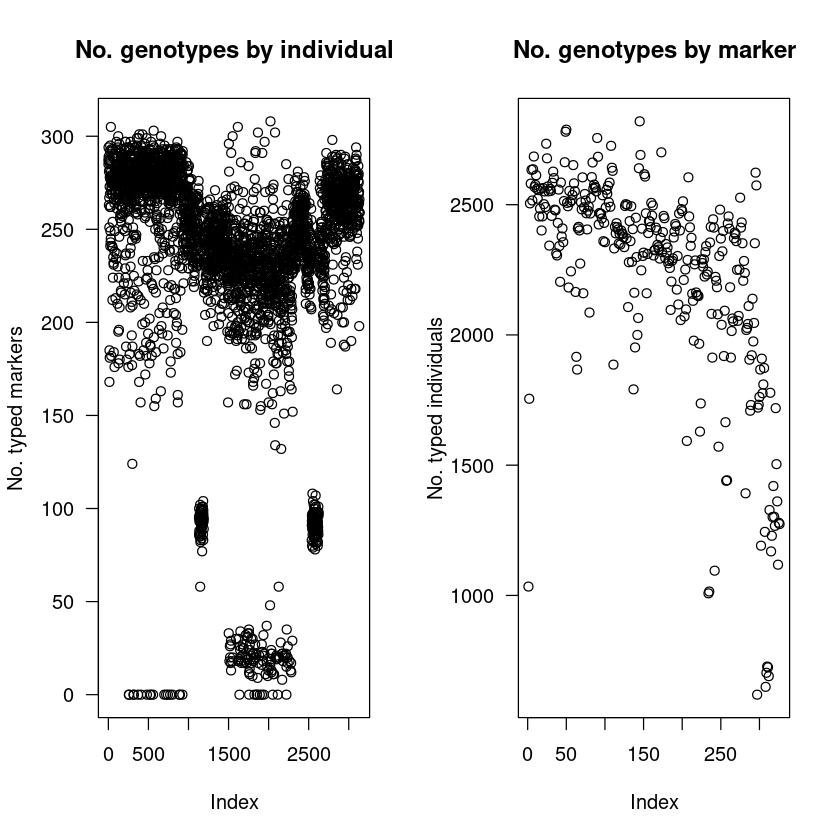

In [13]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.1), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.1, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [14]:
#datf2.2 <- subset(datf2.1, ind=(ntyped(datf2.1)>50)) # removing all individuals that have less than 5% of all markers
datf2.2 <- datf2.1 # do not remove low marker individuals

In [15]:
length(ntyped(datf2.1, "ind"))
length(ntyped(datf2.2, "ind"))

[1] 3135

[1] 3135

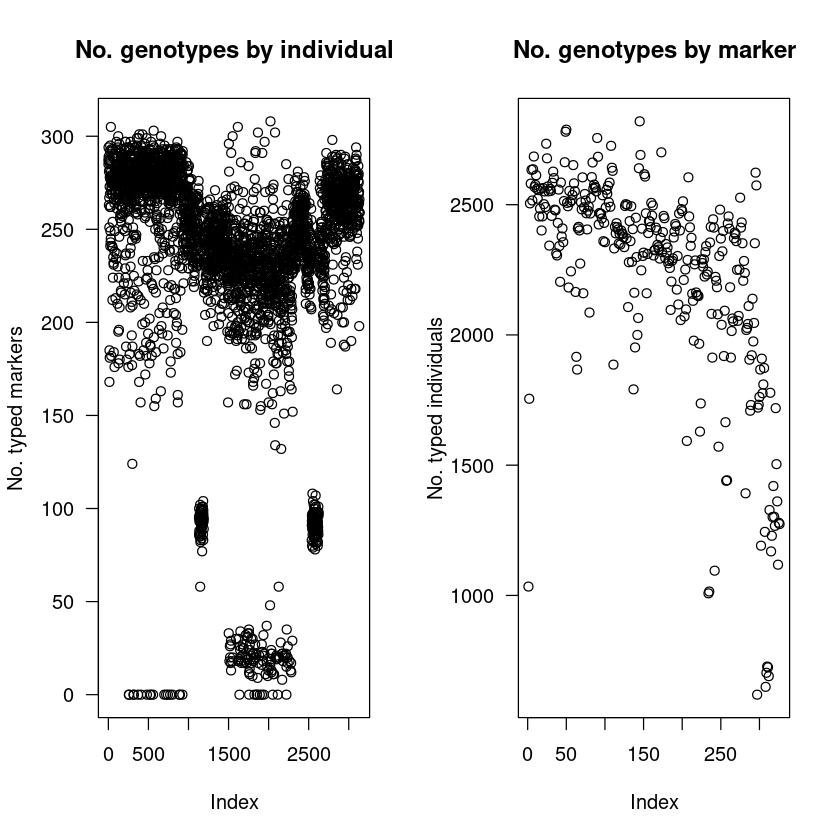

In [16]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.2), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.2, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [17]:
summary(datf2.2)

    F2 intercross

    No. individuals:    3135 

    No. phenotypes:     7 
    Percent phenotyped: 100 99.9 98 98 99.9 99.9 99.9 

    No. chromosomes:    28 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 

    Total markers:      326 
    No. markers:        62 48 26 29 16 11 14 6 10 11 8 6 9 6 8 1 7 3 7 9 5 2 3 5 
                        2 5 4 3 
    Percent genotyped:  71.3 
    Genotypes (%):      AA:26.5  AB:47.1  BB:26.4  not BB:0.0  not AA:0.0 

In [18]:
cg <- comparegeno(datf2.2)

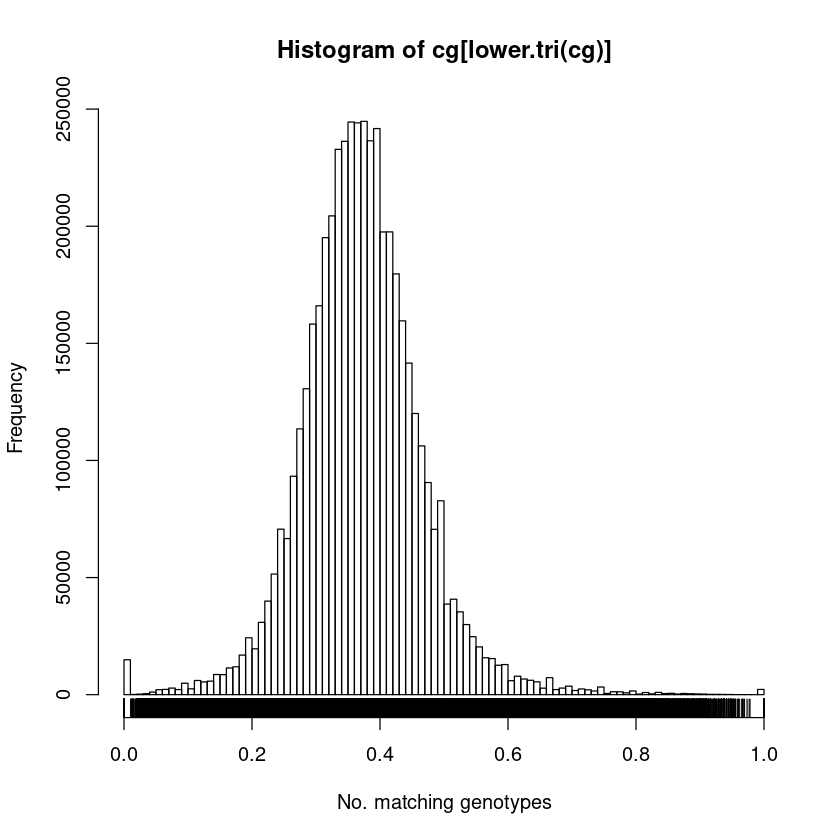

In [19]:
hist(cg[lower.tri(cg)], breaks=seq(0, 1, len=101), xlab="No. matching genotypes") 
rug(cg[lower.tri(cg)])

In [20]:
wh <- which(cg > 0.9, arr=TRUE)
wh <- wh[wh[,1] < wh[,2],]

In [21]:
wh

,row,col
91202,368,538
128202,515,538
91202,368,546
128602,538,546
59402,7,682
91202,368,682
91202,368,689
128302,546,689
91202,368,851
128602,538,851


In [22]:
print(dup <- findDupMarkers(datf2.2, exact.only=FALSE))

$`1-3`
[1] "1-0" "1-1"

$`4-3`
[1] "4-1"

$`7-3`
[1] "7-1"

$`7-33`
[1] "7-36"

$`10-2`
[1] "10-1"

$`11-1`
[1] "11-0"

$`12-17`
[1] "12-19"

$`14-1`
[1] "14-0"

$`15-3`
[1] "15-2"

$`17-3`
[1] "17-1" "17-2"

$`19-3`
[1] "19-1"

$`19-7`
[1] "19-9"

$`20-3`
[1] "20-0" "20-2"

$`20-7`
[1] "20-10" "20-11"

$`21-3`
[1] "21-0" "21-1" "21-2"

$`23-1`
[1] "23-0"

$`24-2`
[1] "24-0" "24-1"

$`24-5`
[1] "24-6"

$`25-3`
[1] "25-0"

$`26-3`
[1] "26-0" "26-1" "26-2" "26-4"

$`27-3`
[1] "27-2" "27-4" "27-6"

$`28-2`
[1] "28-0"



In [23]:
gt <- geno.table(datf2.2)

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”


In [24]:

#### do not drop markers with segregation distortion


gt[gt$P.value < 0.05/totmar(datf2.2),]
todrop <- rownames(gt[gt$P.value < 0.05/totmar(datf2.2),])
#datf2.3 <- drop.markers(datf2.2, todrop)

,chr,missing,AA,AB,BB,not.BB,not.AA,P.value
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1-0,1,2101,136,608,290,0,0,1.209695e-17
1-1,1,1380,279,908,568,0,0,7.436830e-22
1-3,1,630,453,1236,816,0,0,1.149925e-23
1-6,1,554,504,1281,796,0,0,4.193705e-15
1-10,1,501,547,1299,788,0,0,2.073719e-10
1-14,1,619,508,1275,733,0,0,1.451086e-09
1-58,1,680,549,1207,699,0,0,7.430503e-05
1-61,1,571,593,1208,763,0,0,1.777475e-07
1-65,1,633,567,1196,739,0,0,6.526621e-07


In [25]:
length(todrop)

[1] 215

In [26]:
datf2.3 <- datf2.2

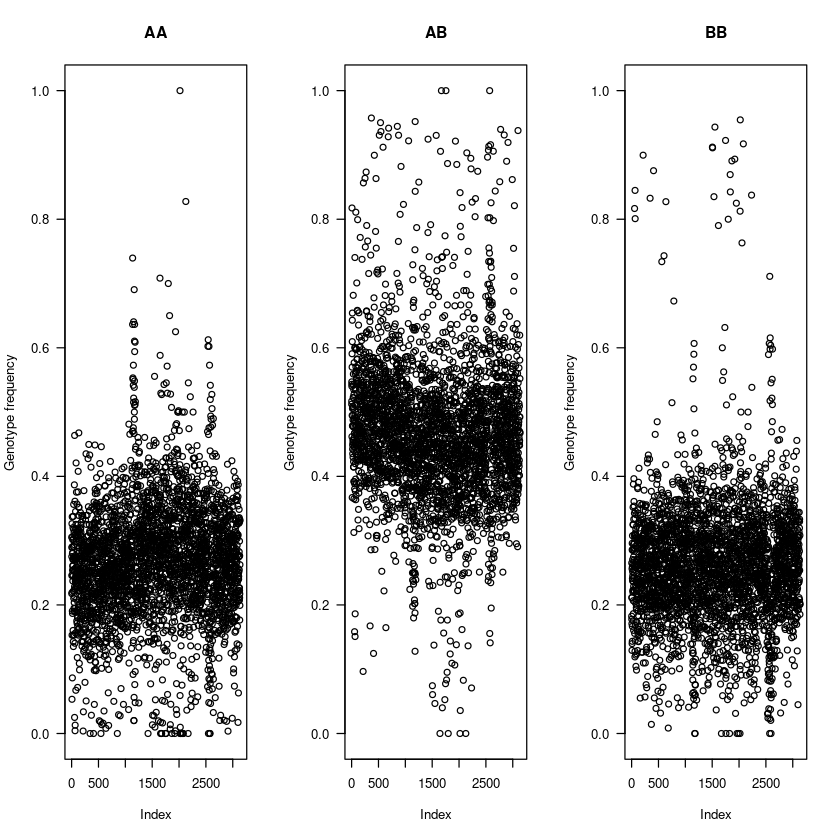

In [27]:
g <- pull.geno(datf2.2)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

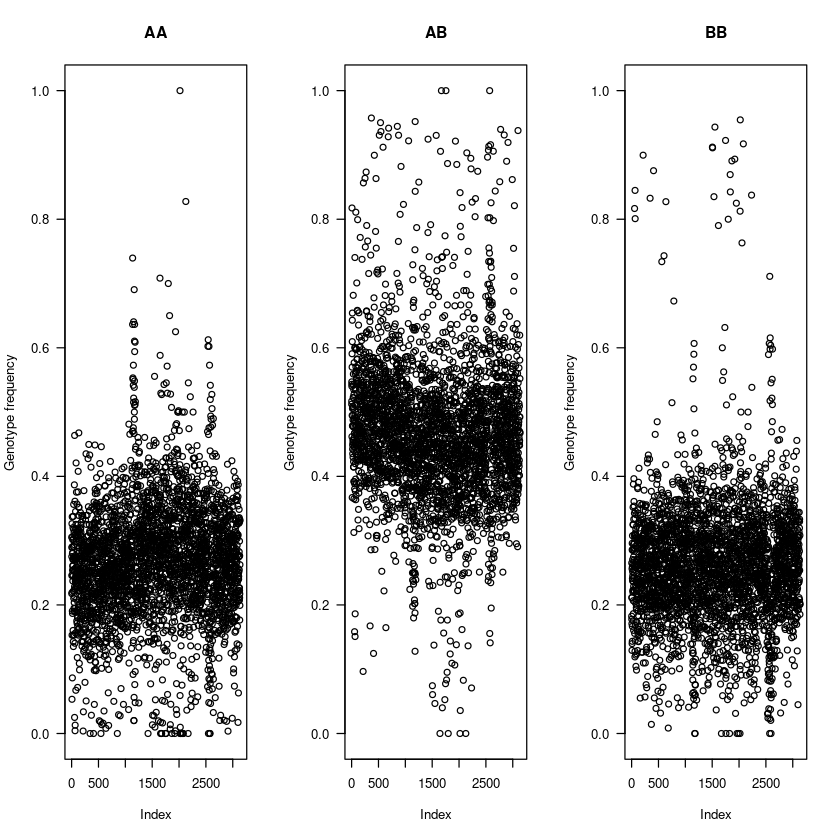

In [28]:
g <- pull.geno(datf2.3)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [29]:
### do not filter for gfreq

In [30]:
#id_gtfreq <- which(gfreq[1,]<0.5 & gfreq[2,]<0.65 & gfreq[2,]>0.35 & gfreq[3,]<0.5)

In [31]:
#datf2.4 <- subset(datf2.3, ind=(id_gtfreq))

In [32]:
datf2.4 <- datf2.3

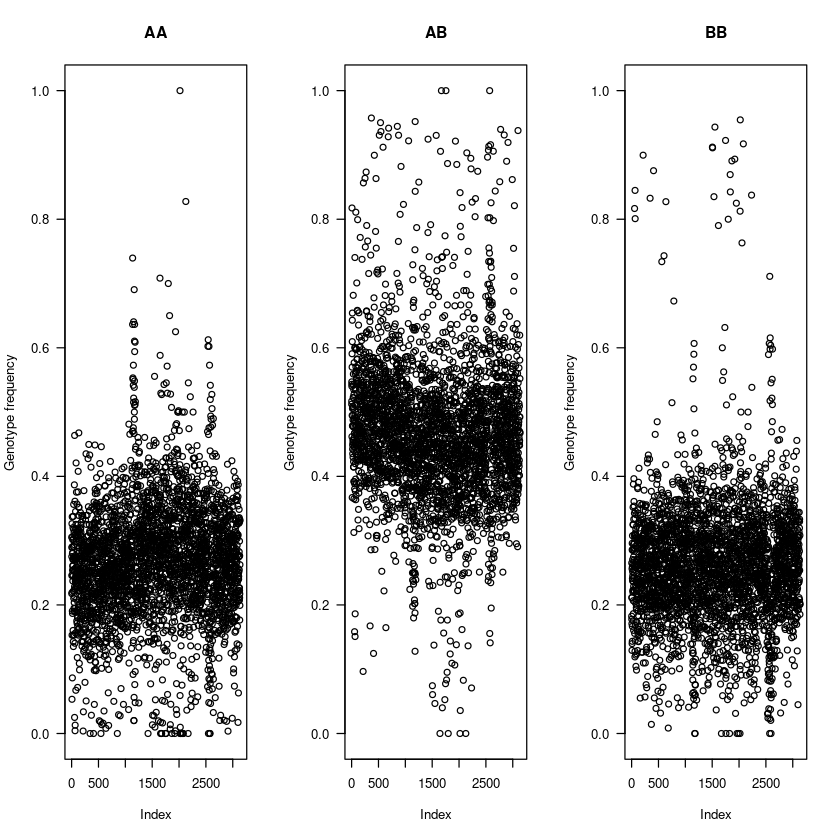

In [33]:
g <- pull.geno(datf2.4)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [34]:
datf2.4 <- est.rf(datf2.4)
datf2.4_tst <- markerlrt(datf2.4)

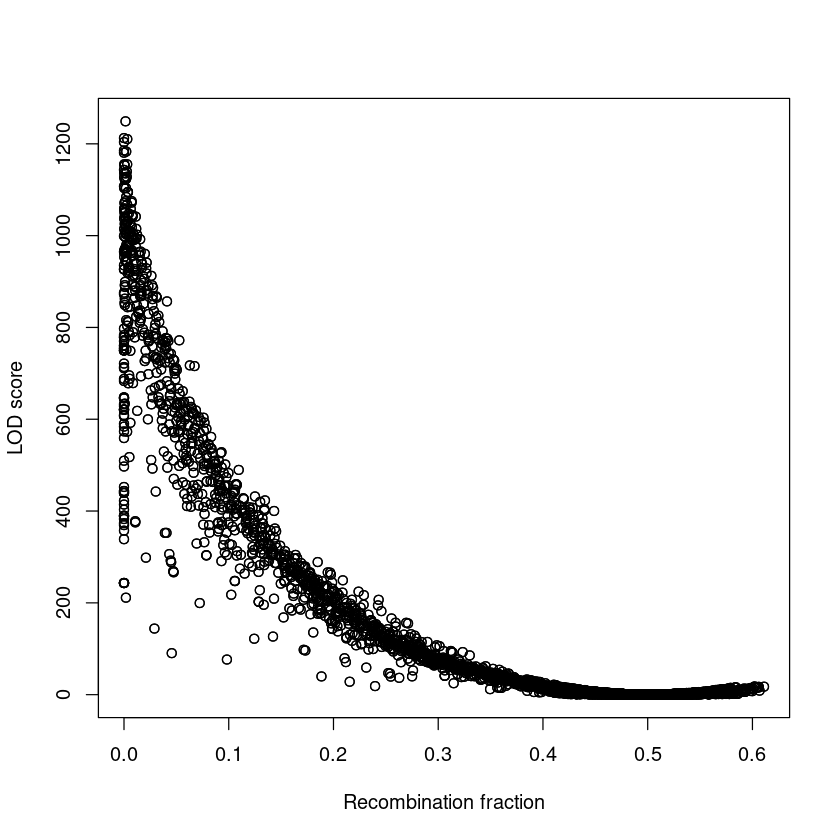

In [35]:
rf <- pull.rf(datf2.4)
lod <- pull.rf(datf2.4, what="lod")
plot(as.numeric(rf), as.numeric(lod), xlab="Recombination fraction", ylab="LOD score")

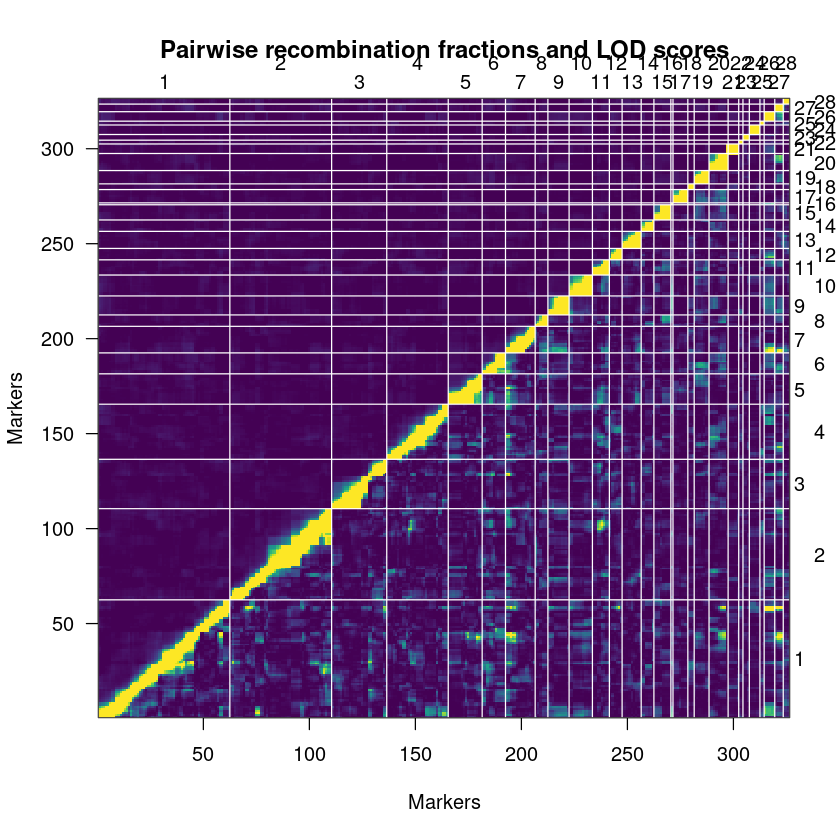

In [36]:
plotRF(datf2.4, alternate.chrid=TRUE)

In [37]:
# maybe skip estimating the map for now?

genmap <- est.map(datf2.4, error.prob=0.005)

In [38]:
summaryMap(genmap)

,n.mar,length,ave.spacing,max.spacing
,<dbl>,<dbl>,<dbl>,<dbl>
1,62,565.6796326,9.2734366,37.6113548
2,48,394.6396950,8.3965893,36.6514607
3,26,271.9978367,10.8799135,95.8129230
4,29,277.7334036,9.9190501,33.9161654
5,16,114.0384266,7.6025618,28.1099902
6,11,91.9057081,9.1905708,33.7252024
7,14,98.7431261,7.5956251,21.6651114
8,6,43.7955456,8.7591091,14.7610145
9,10,41.4594365,4.6066041,24.4358970


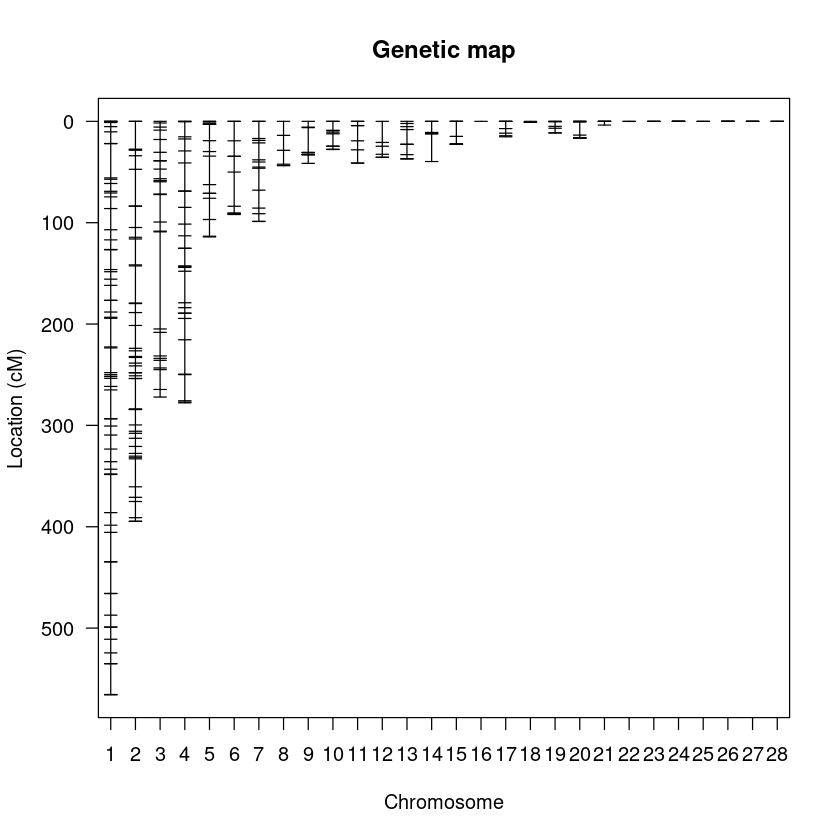

In [39]:
plotMap(genmap)

In [40]:
datf2.4 <- replace.map(datf2.4, genmap)

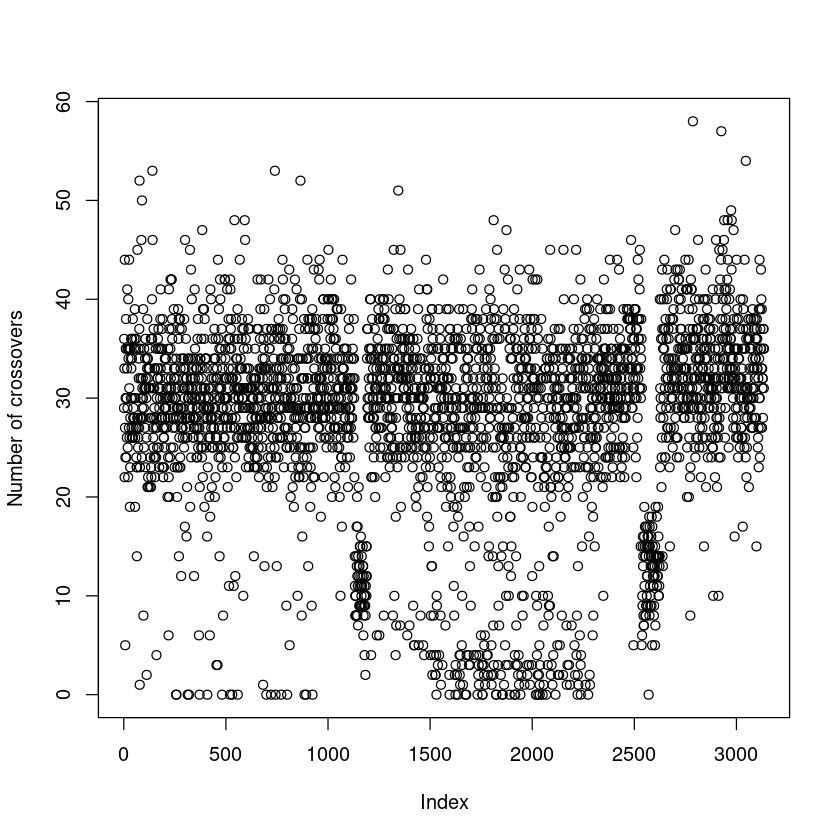

[1] 28.05837

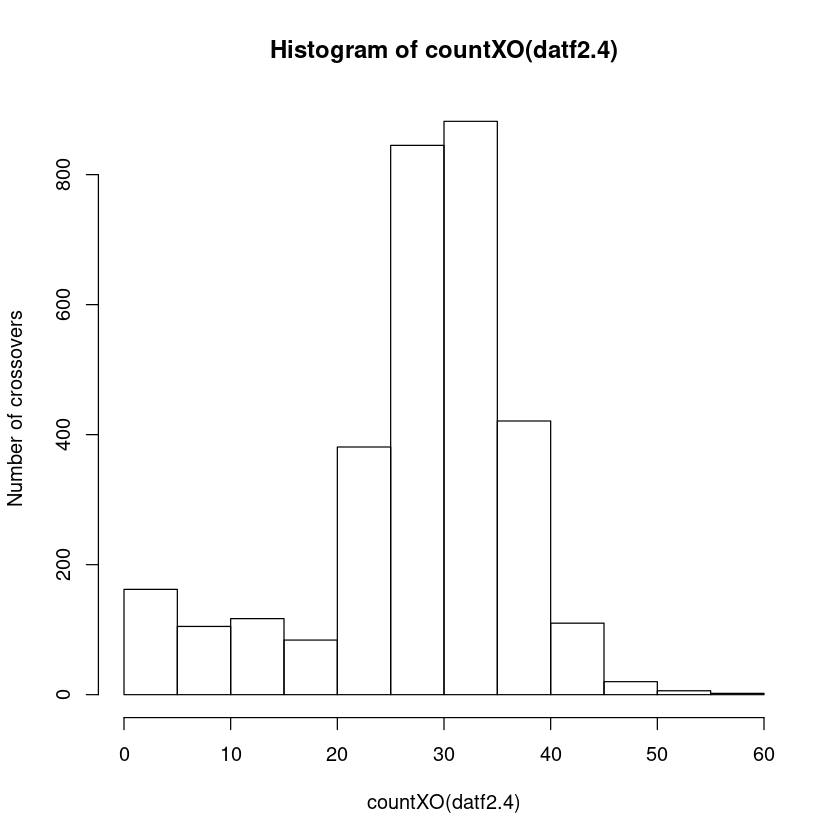

In [41]:
plot(countXO(datf2.4), ylab="Number of crossovers")
hist(countXO(datf2.4), ylab="Number of crossovers")
mean(countXO(datf2.4), ylab="Number of crossovers")


In [42]:
datf2.5 <- datf2.4

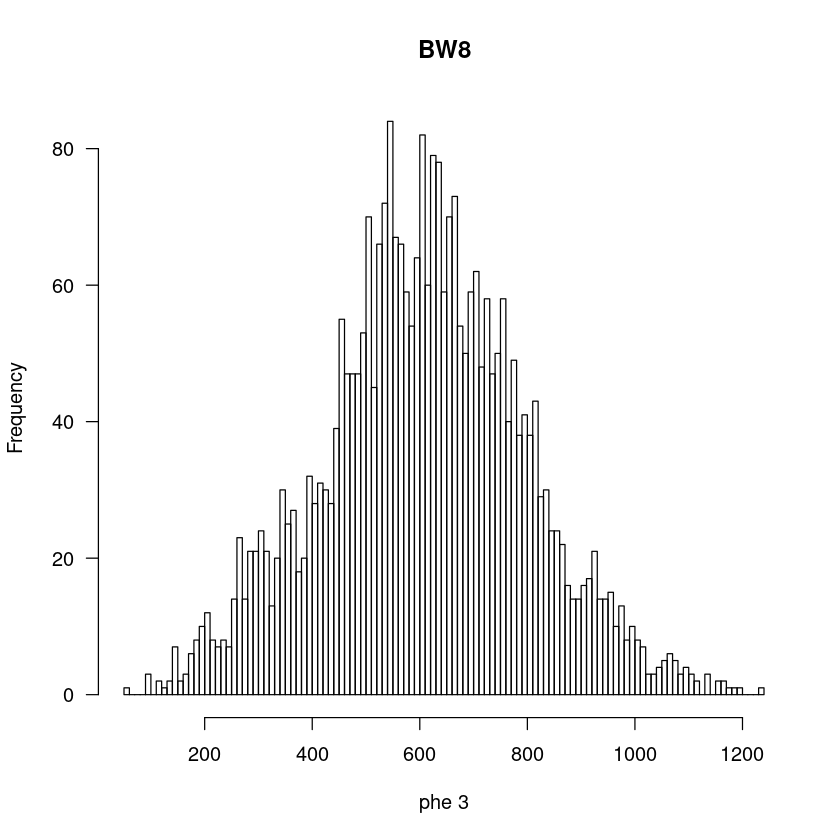

In [43]:
plotPheno(datf2.5, pheno.col=3)

In [44]:
#plotMissing(datf2.5, reorder=TRUE)

In [45]:
datf2.5 <- calc.genoprob(datf2.5, step=1)

In [46]:
datf2.5 <- calc.genoprob(datf2.5, step=0, off.end = 0)


In [47]:
ac <- pull.pheno(datf2.5, c("SEX")) # only need sex since these are all f2s

In [52]:
out.hk.all_ind_wb_mark <- scanone(datf2.5, pheno.col = 3, addcovar=ac, method='hk') 

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 62 individuals with missing phenotypes.
”


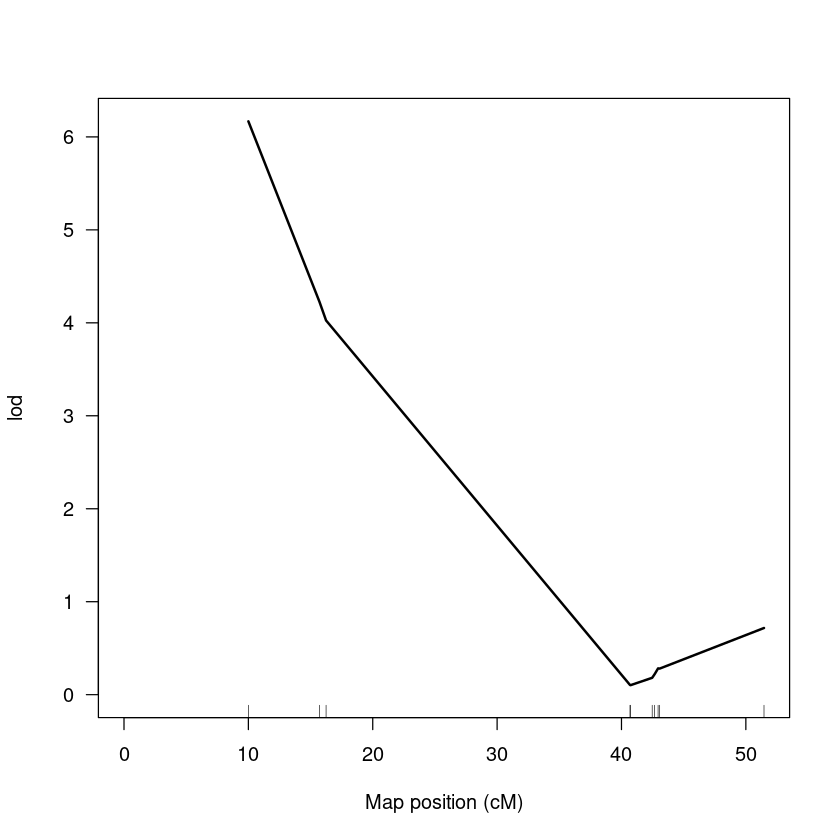

In [53]:
plot(out.hk.all_ind_wb_mark, chr=9)

In [49]:
save.image(file = "20201119_rqtl_all_individs_wahlberg_markers.Rdata")